<h1>
  <center>
    Nonlinear Regression Models
  </center>
</h1>

## What is nonlinear regression?
Nonlinear regression is a statistical technique that helps describe nonlinear relationships in experimental data. Unlike linear regression, which can be computed analytically using linear algebra, the data for nonlinear regression are fitted by a method of successive approximations (iterations).  

As the name suggests, a nonlinear model is any model of the basic form, 
$$ y = f(\vec{x};\vec{\beta}) + \epsilon $$
in which the functional part of the model is *not linear* with respect to the unknown parameters $\beta_0, \beta_1, ...$  

To solve the problem of nonlinear regression, the *method of least squares* is used to estimate the values of the unknown parameters. The goal is finding a vector estimate $\hat{\vec{\beta}}$ which minimizes the residual sum of squares,
$$ RSS = \sum_{i=1}^n [y_i - f(\vec{x_i},\hat{\vec{\beta}})]^2 $$
This means that nonlinear regression can be boiled down to a problem of *function minimization*.

## Nonlinear regression models
In a nonlinear regression model, the parameters can take the form of an exponential, trigonometric, power, or any other nonlinear function. Some examples of nonlinear models include:
- Rational Function (Michaelis-Menten Type)
  $$ f(x;\vec{\beta}) = \frac{\beta_0 + \beta_1 x}{1 + \beta_2 x} $$
- Power Law (Allometric Model)
  $$ f(x;\vec{\beta}) = \beta_1 x^{\beta_2} $$
- Exponential Decay with Offset
  $$ f(x;\vec{\beta}) = \beta_0 + \beta_1 \exp{(- \beta_2 x)} $$
- Mixed Trigonometric Model (Harmonic Regression)
  $$ f(\vec{x};\vec{\beta}) = \beta_1 \sin{\beta_2 + \beta_3 x_1} + \beta_4 \cos{\beta_5 + \beta_6 x_2} $$  

These functions model various natural processes and have applications in fields such as physics, astronomy, biology, chemistry and economics.

## NIST nonlinear regression dataset
The National Institute of Standards and Technology (NIST) proposed a number of datasets used for validating the accuracy and robustness of a certain minimization algorithm for nonlinear regression.  
It includes both generated and "real-world" nonlinear least squares problems of varying levels of difficulty. The database consists of 27 datasets. Below are the 15 models I extracted and will be using to test my nonlinear regression algorithm:  

### Lower difficulty datasets
| Dataset Name | Model Classification | Parameters | Observations | Source |
| --- | --- | --- | --- | --- |
| Misra1a | Exponential | 2 | 14 | Observed |
| Chwirut1 | Exponential | 3 | 214 | Observed |
| Lanczos3 | Exponential | 6 | 24 | Generated |
| Gauss1 | Exponential | 8 | 250 | Generated |
| DanWood | Miscellaneous | 2 | 6 | Observed |
  
### Average difficulty datasets
| Dataset Name | Model Classification | Parameters | Observations | Source |
| --- | --- | --- | --- | --- |
| Kirby2 | Rational | 5 | 151 | Observed |
| MGH17 | Exponential | 5 | 33 | Generated |
| Lanczos1 | Exponential | 6 | 24 | Generated |
| Misra1c | Miscellaneous | 2 | 14 | Observed |
| Roszman1 | Miscellaneous | 4 | 25 | Observed |
  
### Higher difficulty datasets
| Dataset Name | Model Classification | Parameters | Observations | Source |
| --- | --- | --- | --- | --- |
| Thurber | Rational | 7 | 37 | Observed |
| Rat42 | Exponential | 3 | 9 | Observed |
| MGH10 | Exponential | 3 | 16 | Generated |
| Eckerle4 | Exponential | 3 | 35 | Observed |
| Bennett5 | Miscellaneous | 3 | 154 | Observed |

## Visualizing the datasets

Lower difficulty models:


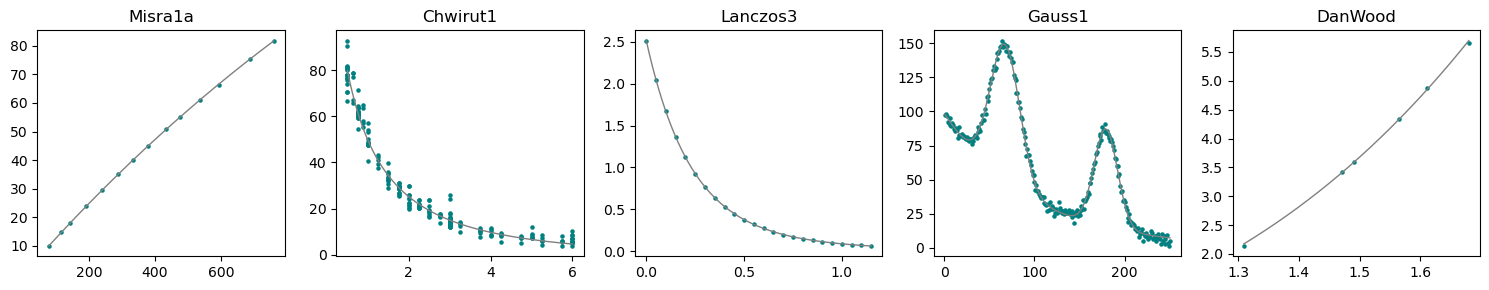

Average difficulty models:


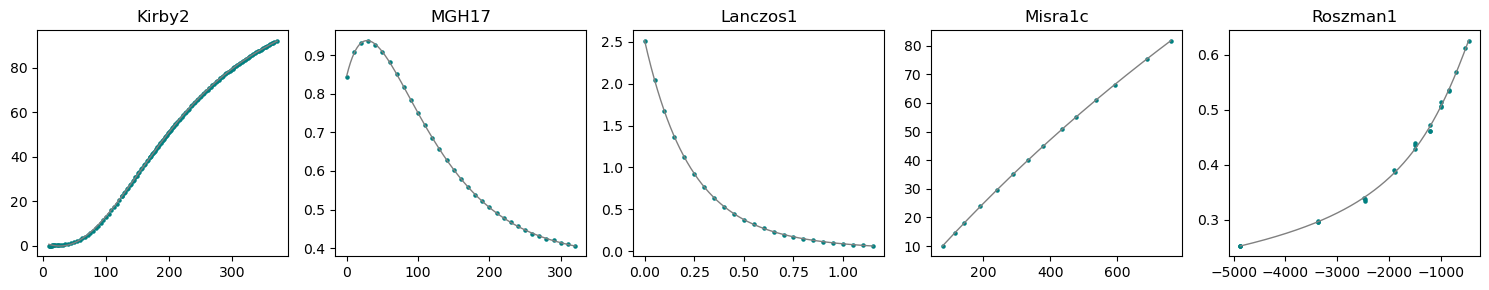

Higher difficulty models:


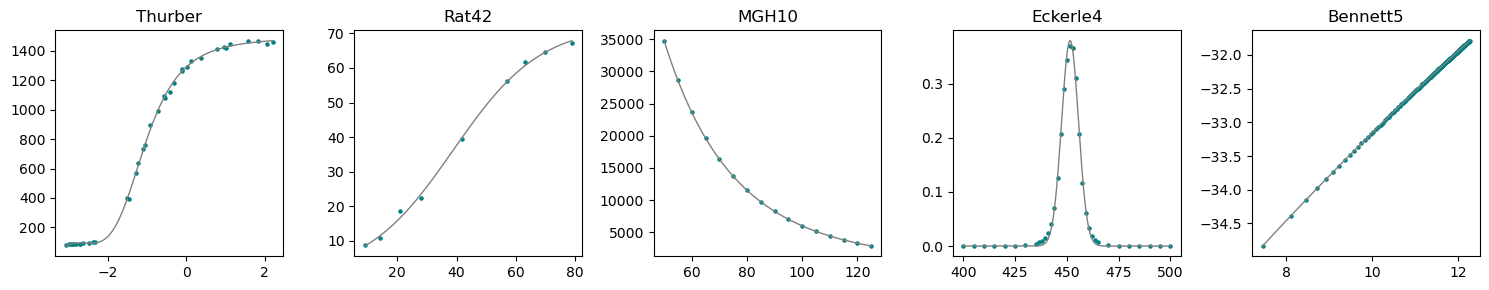

In [20]:
import sys
sys.path.append("../")  # Add project root to Python path
from nist_models.nist_models import NISTModel
import matplotlib.pyplot as plt
import numpy as np

model_names = [["Misra1a", "Chwirut1", "Lanczos3", "Gauss1", "DanWood"],
  ["Kirby2", "MGH17", "Lanczos1", "Misra1c", "Roszman1"],
  ["Thurber", "Rat42", "MGH10", "Eckerle4", "Bennett5"]]
model_difficulties = ["Lower", "Average", "Higher"]

for batch in range(3):
  print(f"{model_difficulties[batch]} difficulty models:")
  fig, axes = plt.subplots(1, 5, figsize=(15, 3))

  for ax, title in zip(axes, model_names[batch]):
    model = NISTModel(title)
    model_df = model.data()
    # Plot model function with certified parameters
    x = np.linspace(min(model_df['x']), max(model_df['x']), 500)
    f = np.zeros(500)
    for i in range(500):
      f[i] = model.evaluate(x[i], model.get_certified_values())
    ax.plot(x, f, linewidth=1, color='grey')
    # Plot observations
    ax.scatter(model_df['x'], model_df['y'], s=5, color='teal')
    ax.set_title(title)
  
  plt.tight_layout()
  plt.show()

## References
- National Institute of Standards and Technology (NIST). (n.d.). *Nonlinear Least Squares Regression*.  
  Retrieved May 10, 2025, from https://www.itl.nist.gov/div898/handbook/pmd/section1/pmd142.htm
  
- National Institute of Standards and Technology (NIST). (n.d.). *Nonlinear Least Squares Regression Background Information*.  
  Retrieved May 10, 2025, from https://www.itl.nist.gov/div898/strd/nls/nls_info.shtml

- National Institute of Standards and Technology (NIST). (n.d.). *Statistical Reference Datasets (STRD)*.  
  Retrieved May 10, 2025, from https://www.itl.nist.gov/div898/strd/frames.html  